In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import argparse
import imutils

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

import skimage.feature
import skimage.viewer
import sys

from data import *

from PIL import Image
import numpy as np
from skimage import transform

%matplotlib notebook

/srv/conda/envs/notebook/lib/python3.7/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *
Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
np_image1 = Image.open('PAN_AOI_2_Vegas_img1016.png')
#np_image1 = Image.open('/data/spacenet/bldg/AllTest/PAN-PNG/PAN_AOI_2_Vegas_img1000.png')
np_image1 = np.array(np_image1).astype('float32')/255
np_image1 = transform.resize(np_image1, (256, 256, 1))
np_image1 = np.expand_dims(np_image1, axis=0)

In [3]:
invert = cv2.bitwise_not(np_image1)

In [4]:
saveResult("data",invert)

Lossy conversion from float32 to uint8. Range [-12.256722450256348, -7.9792351722717285]. Convert image to uint8 prior to saving to suppress this warning.


### Load the image, convert it to grayscale, blur it slightly, and threshold it

In [5]:
# load the image, convert it to grayscale, blur it slightly,
# and threshold it
#image = cv2.imread("PAN_AOI_2_Vegas_img1016.png")
image = cv2.imread('0_predict.png')
#print('shape={}'.format(image.shape))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)[1]

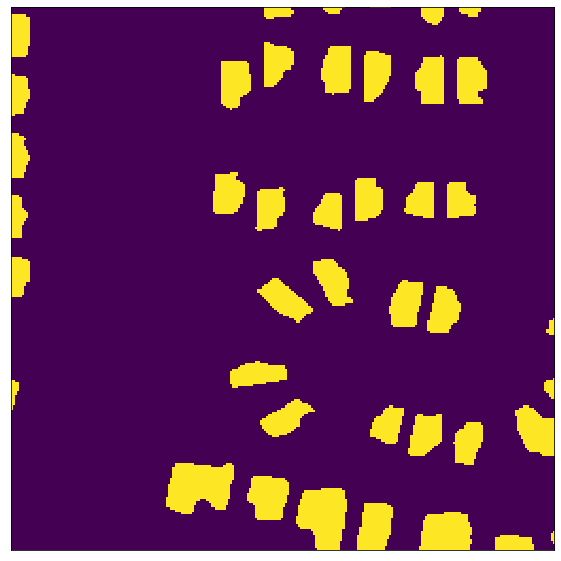

In [6]:
plt.figure(figsize = (10,10))
plt.imshow(thresh)
plt.xticks([]), plt.yticks([])
plt.show()

### Read and show Real Image

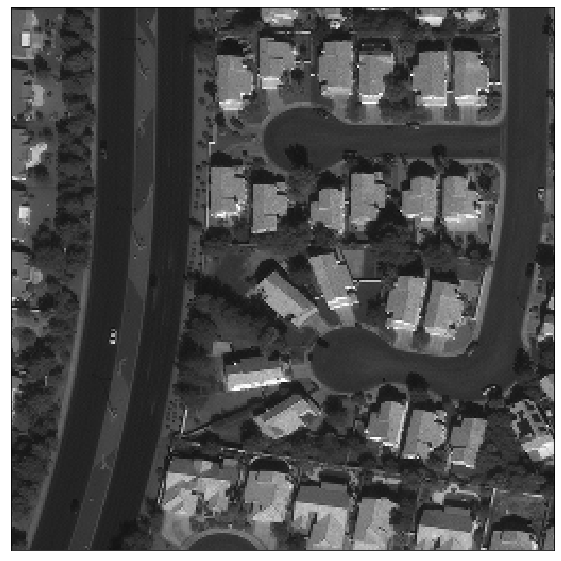

In [39]:
#real_image = cv2.imread('/data/spacenet/bldg/AllTest/PAN-PNG/PAN_AOI_5_Khartoum_img1001.png')
real_image = cv2.imread('/data/spacenet/bldg/AllTest/PAN-PNG/PAN_AOI_2_Vegas_img1016.png')
real_image = cv2.resize(real_image, (256,256))

plt.figure(figsize = (10,10))
plt.imshow(real_image)
plt.xticks([]), plt.yticks([])
plt.show()

### Find Contours

In [40]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#cnts

### Draw Contours on Real Image

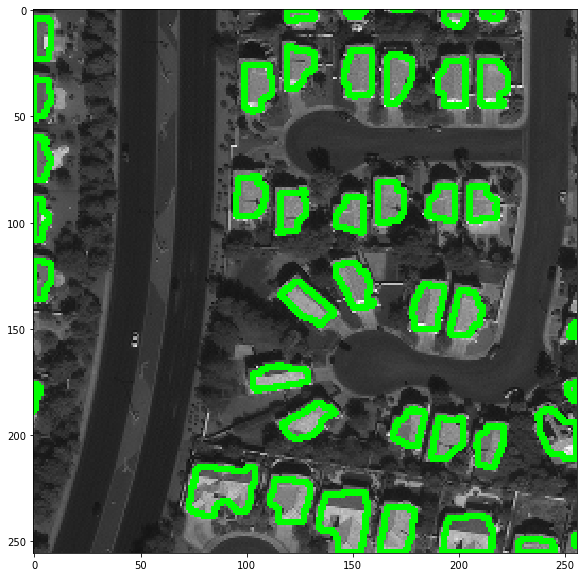

In [37]:
img_cnt = cv2.drawContours(real_image, cnts, -1, (0, 255, 0), 2)

plt.figure(figsize = (10,10))
plt.imshow(img_cnt)

### Find and annotate Center

ZeroDivisionError: float division by zero

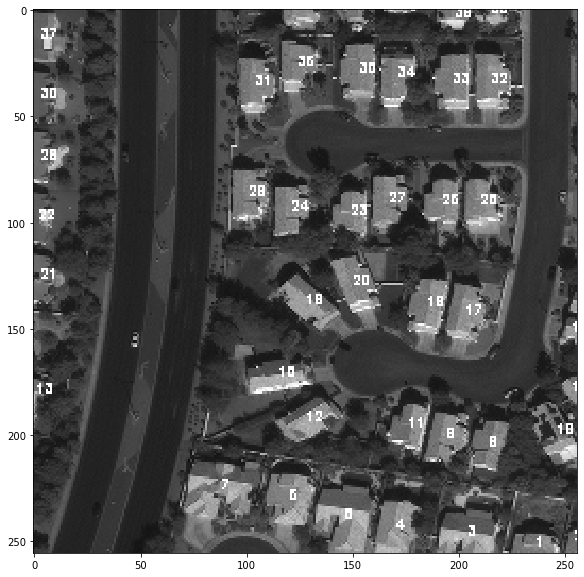

In [41]:
# loop over the contours
plt.figure(figsize = (10,10))
i=1
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # draw the contour and center of the shape on the image
    #cv2.drawContours(real_image, [c], -1, (0, 255, 0), 2)
    #cv2.circle(real_image, (cX, cY), 2, (255, 255, 255), -1)
    cv2.putText(real_image, str(i), (cX, cY),cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), 0)
    # show the image
    plt.imshow(real_image)
    cv2.waitKey(0)
    i+=1
# plt.imshow(image)
# plt.xticks([]), plt.yticks([])
# plt.show()
#saveResult("data/membrane/test2",image)